DecisionTreeClassifier de scikit learn est capable de gérer des problèmes de classification à plusieurs classes (par exemple, avec les étiquettes 0, 1, … K-1). Dans cet exemple nous allons travailler avec la base de données Iris, facilement accessible dans sklearn. Cette base contient 150 instances d’iris (un type de plante, chaque observation décrit sa morphologie). L’objectif est de classer chaque instance en une des trois catégories : Iris setosa, Iris virginica ou Iris versicolor.

Une des classes est linéairement séparable par rapport aux deux autres, mais les deux autres ne sont pas séparables une par rapport à l’autre.

Les attributs du jeu de données sont :
longueur de sépale,

largeur de sépale,

longueur de pétale,

largeur de pétale,

classe : Iris Setosa, Iris Versicolor ou Iris Virginica.

Un échantillon : (4.9,3.6,1.4,0.1, “Iris-setosa”)



In [14]:
#Le jeu de données Iris étant très commun, scikit-learn propose une fonction native
#permettant de le charger en mémoire :
from sklearn.datasets import load_iris

iris= load_iris()
X, y = iris.data, iris.target

In [19]:
#Calculer les statistiques (moyenne et écart-type) des quatre variables explicatives : longueur de
#sépale, largueur de sépale, longueur de pétale et largeur de pétale. Skewness= Asymétrie, écart type est la racinecarrée de la variance c'est pour étudier la dispersion des données
import scipy as sp
import numpy as np
sp.stats.describe(iris.data[:,:5])  

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [21]:
#Combien y a-t-il d’exemples de chaque classe ?
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [22]:
#Avant de construire le modèle, séparons le jeu de données en deux : 70% pour l’apprentissage, 30%
#pour le test, utiliser la bibliothèque scikit learn.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [23]:
#Nous pouvons désormais construire un arbre de décision sur ces données en utilisant
#DecisionTreeClassifier de scikit learn
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(133.92000000000002, 195.696, 'X[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 65.232, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267

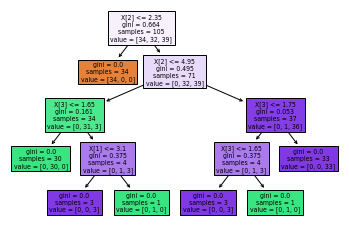

In [24]:
#Une fois l’apprentissage terminé, nous pouvons visualiser l’arbre avec matplotlib en passant par la méthode plot_tree
tree.plot_tree(clf, filled=True)


In [25]:
#Une fois le modèle construit, il est possible de l’utiliser pour la prédiction sur de nouvelles données :
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

[Text(133.92000000000002, 181.2, 'X[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]')]

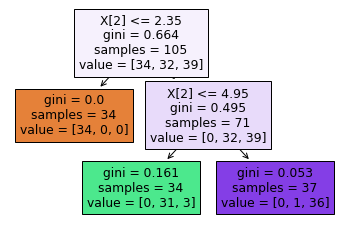

In [31]:
#Changez la valeur du parametre max_depth. Que constatez-vous ?
clf = tree.DecisionTreeClassifier( min_samples_leaf=20)
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)

In [9]:
#Changez les valeurs de parametres max_depth et min_samples_leaf. Que constatez-vous ?
